In [123]:
# Initial imports
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

#  Import and read the file.
import pandas as pd 
supply_df = pd.read_csv("./CAISO-ALL-SUPPLY-DATA.csv")
supply_df.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime,Unix Timestamp
0,2005.0,8736.0,3428.0,7108.0,-8.0,1616.0,-6.0,0.0,4/10/2018,00:00:00,2018-04-10 00:00:00,1.523318e+09
1,2005.0,8722.0,3425.0,7029.0,1.0,1618.0,-6.0,0.0,4/10/2018,00:05:00,2018-04-10 00:05:00,1.523319e+09
2,2048.0,8739.0,3464.0,6873.0,6.0,1619.0,-6.0,0.0,4/10/2018,00:10:00,2018-04-10 00:10:00,1.523319e+09
3,1979.0,8696.0,3470.0,6744.0,-14.0,1619.0,-6.0,0.0,4/10/2018,00:15:00,2018-04-10 00:15:00,1.523319e+09
4,1980.0,8605.0,3454.0,6757.0,-38.0,1616.0,-6.0,0.0,4/10/2018,00:20:00,2018-04-10 00:20:00,1.523320e+09


In [124]:
supply_df['Sum'] = supply_df['Renewables'] + supply_df['Large hydro'] + supply_df['Imports'] + supply_df['Batteries'] + supply_df['Nuclear'] + supply_df['Coal'] + supply_df['Other']

In [125]:
supply_df= supply_df.drop(['Renewables', 'Batteries', 'Large hydro', 'Imports', 'Other', 'Nuclear', 'Coal', 'DateTime', 'Unix Timestamp'],1)
supply_df.head(1000)

,Natural gas,Date,Time,Sum
0,8736.0,4/10/2018,00:00:00,14143.0
1,8722.0,4/10/2018,00:05:00,14072.0
2,8739.0,4/10/2018,00:10:00,14004.0
3,8696.0,4/10/2018,00:15:00,13792.0
4,8605.0,4/10/2018,00:20:00,13763.0
...,...,...,...,...
995,4991.0,4/14/2018,03:15:00,15083.0
996,4972.0,4/14/2018,03:20:00,15093.0
997,4975.0,4/14/2018,03:25:00,15071.0
998,4974.0,4/14/2018,03:30:00,15055.0


In [126]:
supply_df['Date'] = pd.to_datetime(supply_df['Date'])

In [127]:
def fun(datetimething):
     return datetimething.timetuple().tm_yday

In [128]:
supply_df['Date'] = supply_df['Date'].apply(fun)
supply_df.head(1000)

,Natural gas,Date,Time,Sum
0,8736.0,100,00:00:00,14143.0
1,8722.0,100,00:05:00,14072.0
2,8739.0,100,00:10:00,14004.0
3,8696.0,100,00:15:00,13792.0
4,8605.0,100,00:20:00,13763.0
...,...,...,...,...
995,4991.0,104,03:15:00,15083.0
996,4972.0,104,03:20:00,15093.0
997,4975.0,104,03:25:00,15071.0
998,4974.0,104,03:30:00,15055.0


In [129]:
supply_df.dtypes

Natural gas    float64
Date             int64
Time            object
Sum            float64
dtype: object

In [130]:
baby_df = supply_df['Time'].str.split(":", expand=True)
print(baby_df)

         0   1   2
0       00  00  00
1       00  05  00
2       00  10  00
3       00  15  00
4       00  20  00
...     ..  ..  ..
412951  23  35  00
412952  23  40  00
412953  23  45  00
412954  23  50  00
412955  23  55  00

[412956 rows x 3 columns]


In [131]:
baby_df[0] = baby_df[0].astype(int)
baby_df[1] = baby_df[1].astype(int)

In [132]:
baby_df= baby_df.drop([2],1)

In [133]:
baby_df.dtypes

0    int64
1    int64
dtype: object

In [134]:
baby_df = baby_df.rename(columns={baby_df.columns[0]: 'Hours'})
baby_df = baby_df.rename(columns={baby_df.columns[1]: 'Minutes'})

In [135]:
baby_df.head()

,Hours,Minutes
0,0,0
1,0,5
2,0,10
3,0,15
4,0,20


In [136]:
final_df = pd.merge(baby_df, supply_df, left_index=True, right_index=True, how='outer')

In [137]:
final_df.dtypes

Hours            int64
Minutes          int64
Natural gas    float64
Date             int64
Time            object
Sum            float64
dtype: object

In [138]:
final_df= final_df.drop(['Time'],1)

In [139]:
len(final_df)

412956

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [141]:
final_df.head(1000)

,Hours,Minutes,Natural gas,Date,Sum
0,0,0,8736.0,100,14143.0
1,0,5,8722.0,100,14072.0
2,0,10,8739.0,100,14004.0
3,0,15,8696.0,100,13792.0
4,0,20,8605.0,100,13763.0
...,...,...,...,...,...
995,3,15,4991.0,104,15083.0
996,3,20,4972.0,104,15093.0
997,3,25,4975.0,104,15071.0
998,3,30,4974.0,104,15055.0


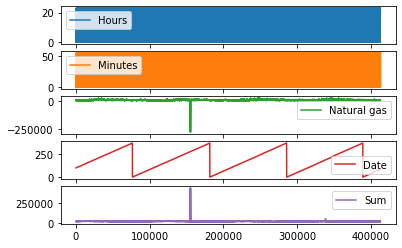

In [142]:
axes = final_df.plot.line(subplots=True)


In [143]:
(final_df['Minutes']).head(412596)

0          0
1          5
2         10
3         15
4         20
          ..
412591    35
412592    40
412593    45
412594    50
412595    55
Name: Minutes, Length: 412596, dtype: int64

In [144]:
(final_df['Natural gas'] < 0).any().any()

True

In [145]:
final_df['Natural gas'][final_df['Natural gas'] < 0] = 0

<ipython-input-145-d0d7948091e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Natural gas'][final_df['Natural gas'] < 0] = 0


In [146]:
final_df['Sum'][final_df['Sum'] > 200000] = 0

<ipython-input-146-3fea44fce3f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Sum'][final_df['Sum'] > 200000] = 0


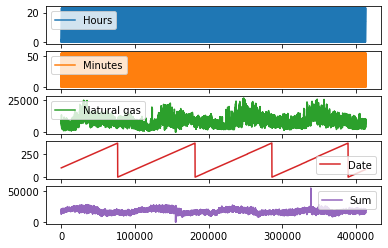

In [147]:
axes = final_df.plot.line(subplots=True)

In [156]:
# Create our features
X = final_df.drop("Natural gas", axis = 1)

# Create our target
y = final_df.loc[:, 'Natural gas'].copy()

In [157]:
final_df = final_df.dropna()

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [159]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [160]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [161]:
final_df.isnull().values.any()

False

In [162]:
count = np.isinf(final_df).values.sum()
print(count)

0


In [163]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

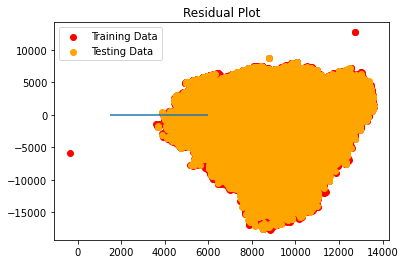

In [164]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="red", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=6000, xmax=1500)
plt.title("Residual Plot")
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

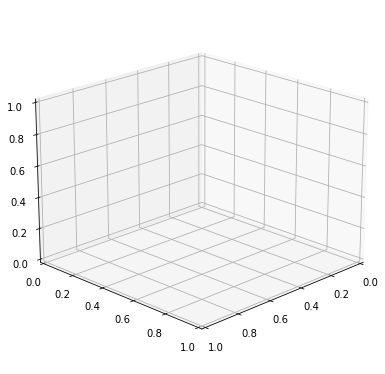

In [111]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()